# QUESTION : MAKE SPATIAL PLOTS USING (PRECIPITATION FLUX DATA) FOR THE 12 MONTHS OF A YEAR IN THE PAST AND A YEAR IN THE FUTURE

In [10]:
import xarray as xr 
#Imports the xarray library for handling multi-dimensional arrays

import matplotlib.pyplot as plt 
#Imports the matplotlib library’s pyplot module pyplot is used for creating plots.

import cartopy.crs as ccrs 
#Imports the cartopy library’s (coordinate reference systems) module 
#It is used for different map projections and geographical coordinate systems.

import cartopy.feature as cfeature
#Imports cartopy’s feature module. 
#It is used to add geographical features like coastlines and borders to maps.

from PIL import Image
# Imports the Image class from the PIL (Python Imaging Library) module. 
# PIL is used for opening, manipulating, and saving image files.

from cartopy.feature import NaturalEarthFeature
# Imports the NaturalEarthFeature class from cartopy’s feature module. 
# This is used to include specific geographical features, like rivers and lakes, based on Natural Earth data.

In [11]:
DATASET = xr.open_dataset('MET254_data.nc')
#This line of code opens the NetCDF file and loads its data into a xarray.Dataset object (DATASET) for analysis.

In [12]:
DATASET.data_vars
# Request is made for the variables contained in the dataset

Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    tas        (time, latitude, longitude) float32 ...
    rain       (time, latitude, longitude) float32 ...

In [13]:
RAIN = DATASET.rain
RAIN
# Loads the rain variable(DATA ARRAY) from the dataset into the variable RAIN

<xarray.DataArray 'rain' (time: 47482, latitude: 37, longitude: 23)>
[40407182 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1971-01-01T12:00:00 ... 2100-12-31T12:00:00
  * longitude  (longitude) float32 -3.41 -3.19 -2.97 -2.75 ... 0.99 1.21 1.43
  * latitude   (latitude) float32 4.51 4.73 4.95 5.17 ... 11.99 12.21 12.43
    height     float64 ...
Attributes:
    standard_name:     precipitation_flux
    long_name:         Precipitation
    units:             mm/day
    comment:           at surface; includes both liquid and solid phases from...
    original_name:     pr
    original_units:    kg m-2 h-1
    history:           2019-03-28T19:13:27Z altered by CMOR: Converted units ...
    cell_methods:      time: mean
    associated_files:  gridspecFile: gridspec_atmos_fx_GERICS-REMO2015_histor...

In [14]:
RAIN_2000 = RAIN.sel(time=slice('2000-01-01', '2000-12-31'))
# Extracts and filters the rainfall data for the year 2000 from the RAIN data array into 'RAIN_2000' variable

RAIN_2090 = RAIN.sel(time=slice('2090-01-01', '2090-12-31'))
# Extracts and filters the rainfall data for the year 2090 from the RAIN data array into 'RAIN_2090' variable

In [15]:
MONTHLY_RAIN_2000 = RAIN_2000.resample(time='M').mean()
# Resamples the daily rainfall data for 2000 to monthly intervals and calculates the average rainfall for each month. 
# This results in a DataArray with one average value for each month in 2000

MONTHLY_RAIN_2090 = RAIN_2090.resample(time='M').mean()
# Resamples the daily rainfall data for 2090 to monthly intervals and calculates the average rainfall for each month. 
# This results in a DataArray with one average value for each month in 2000

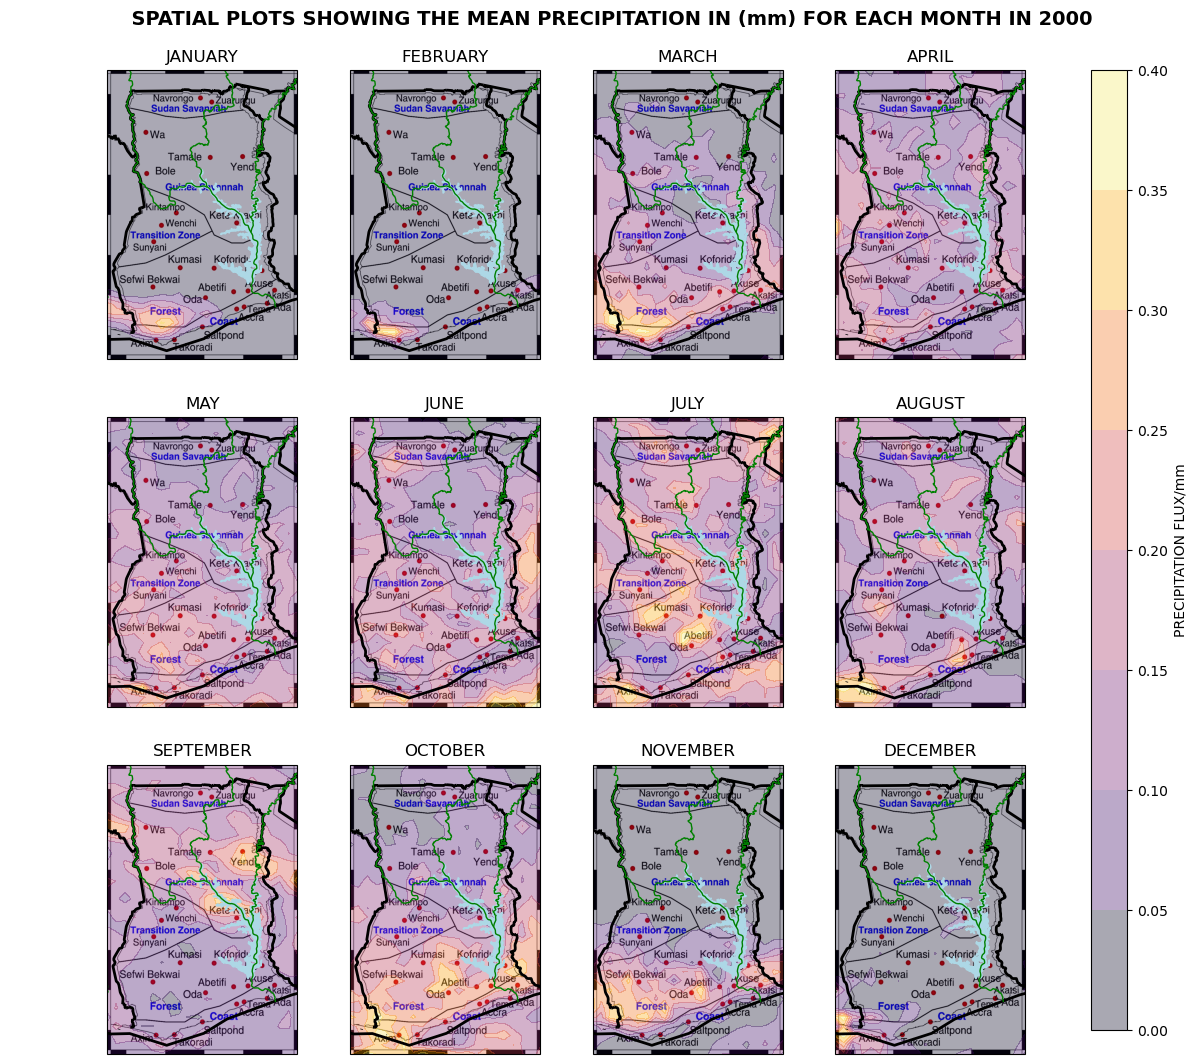

In [29]:
image = Image.open('journal.png')
# Opens the Newly Revised Agro-Climatic Zone map image file named 'journal.png'
# It is located in the same directory as the notebook and loads it into the variable 'image' 
# Image source : https://journals.plos.org/climate/article/figure?id=10.1371/journal.pclm.0000023.g005

fig, ax = plt.subplots(3, 4, figsize=(12,12), subplot_kw={'projection': ccrs.PlateCarree()})
# creates a 3x4 grid of subplots within a 12x12 inch figure
# subplot_kw specifies additional keyword arguments to be passed to each subplot.
# Thus each subplot using the PlateCarree map projection for plotting geographical data

ax = ax.flatten()
# Converts the 2D array of subplots into a 1D array, making it easier to iterate over and manage all subplots.
# This is particularly helpful for applying uniform settings or plotting data across multiple subplots.

month_names = ['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL',
               'MAY', 'JUNE','JULY', 'AUGUST', 
               'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER']
# Defines a list of strings representing the names of the 12 months in the year

for i in range(12):
#     This initializes a loop that will iterate 12 times, once for each month of the year. 

    ax[i].imshow(image, extent=[-3.4,1.2,4.5,11.5], transform=ccrs.PlateCarree())
#      Plots the background image (loaded from journal.png) onto the 'i'th subplot.
#      Extent Specifies the bounding box of the image in terms of geographical coordinates
#      ccrs.PlateCarree(): Indicates that the coordinates are in the Plate Carrée projection, 
#      ..which means the extent values are directly interpreted as latitude and longitude.

    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=2)
#      Adds coastlines to the map, with a scale of 110 meters and a width of 2 points for more detailed coastlines.

    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
#      Adds country borders to the map with a width of 2 points

    ax[i].add_feature(cfeature.OCEAN)
#     Adds ocean features to the map
    
    ax[i].add_feature(cfeature.LAKES, color='lightblue')
#     Adds lake features to the map with a lightblue color
    
    rivers = NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m', edgecolor='g', facecolor='none')
    ax[i].add_feature(rivers)
#     Takes rivers and lakes centerlines features from the Natural Earth dataset, which is a public domain map dataset.
#     By specifying 'physical', you are telling Cartopy to look for natural features.
#     10m specifies highest resolution of the dataset
#     Sets the edge color of the rivers to green.
#     facecolor='none' ensures that the rivers are not filled with any color, making it transparent. 
#     Only the edges, specified by edgecolor, will be visible.

    ax[i].set_extent([-3.4, 1.2, 4.5, 11.5], crs=ccrs.PlateCarree())
#     Sets the geographic extent of the map, defined by the bounds in degrees of longitude and latitude.
#     crs=ccrs.PlateCarree(): Specifies that these bounds are in the Plate Carrée projection.

    ax[i].set_title(month_names[i])
#     Looks through the array containg the names of the months and assigns it to each of the subplots by the index of iteration.
    
    cb = ax[i].contourf(MONTHLY_RAIN_2000.longitude, MONTHLY_RAIN_2000.latitude, MONTHLY_RAIN_2000[i], 
                        transform=ccrs.PlateCarree(),cmap='inferno', alpha=0.35)
#    Plots the actual data with filled contours on the specified 'i'th subplot with specified longitude and latitude coordinates.
#    This argument specifies the coordinate reference system that the input data (longitude and latitude) is in.
#    ccrs.PlateCarree() is a common projection where the data is assumed to be in geographic coordinates(longitude and latitude).
#    This ensures that the data is correctly projected onto the map.
#    inferno is specified from Matplotlib's uniform sequential colormaps to use for the contour plot
#    By setting alpha=0.35, the contours are made semi-transparent, allowing underlying features 
#    ...(such as the background image or other map features) to be visible.(0<=alpha<=1)

cbar_kwargs = fig.add_axes([0.95, 0.13, 0.03, 0.8])  
#  A colorbar axes is created and its position and size is specified.
#  The code positions the colorbar towards the right edge of the figure, extending from near the bottom to near the top.

fig.colorbar(cb, cax=cbar_kwargs, label='PRECIPITATION FLUX/mm')
# integrates a colorbar into the figure, with the 'cb' object  representing the filled contour plot.
# It is positioned precisely using the axes defined earlier, and labelled for clarity. 

fig.subplots_adjust(wspace=0.2, top=0.93)
# Adjusts the horizontal spacing between subplots to 0.2 times the average width of the subplots
# and leaves 7% margin at the top of the subplots for title or other annotations.

fig.suptitle('                  SPATIAL PLOTS SHOWING THE MEAN PRECIPITATION IN (mm) FOR EACH MONTH IN 2000', 
             fontsize=14,y=0.98,fontweight='bold')
# Adds a title to the entire figure with fontsize of 14
# y=0.98: Vertical position of the title(98% of the height from the bottom of the whole figure)
# fontweight='bold': Makes the title bold.

fig.savefig(r'C:\Users\HP\Desktop\PRECIPITATION\2000_Prep.png', dpi=1200, bbox_inches='tight')
# Saves the figure onto the desktop with the 'png' extension in high resolution (1200 dots per inch)
# The code ensures that the bounding box is tight around the figure, removing any extra whitespace around the edges.
# When you prefix a string with r, Python treats it as a raw string. 
# This means that special characters (like backslashes \) are interpreted literally and not as escape characters such as newline or tab

plt.show()
# Shows the figure

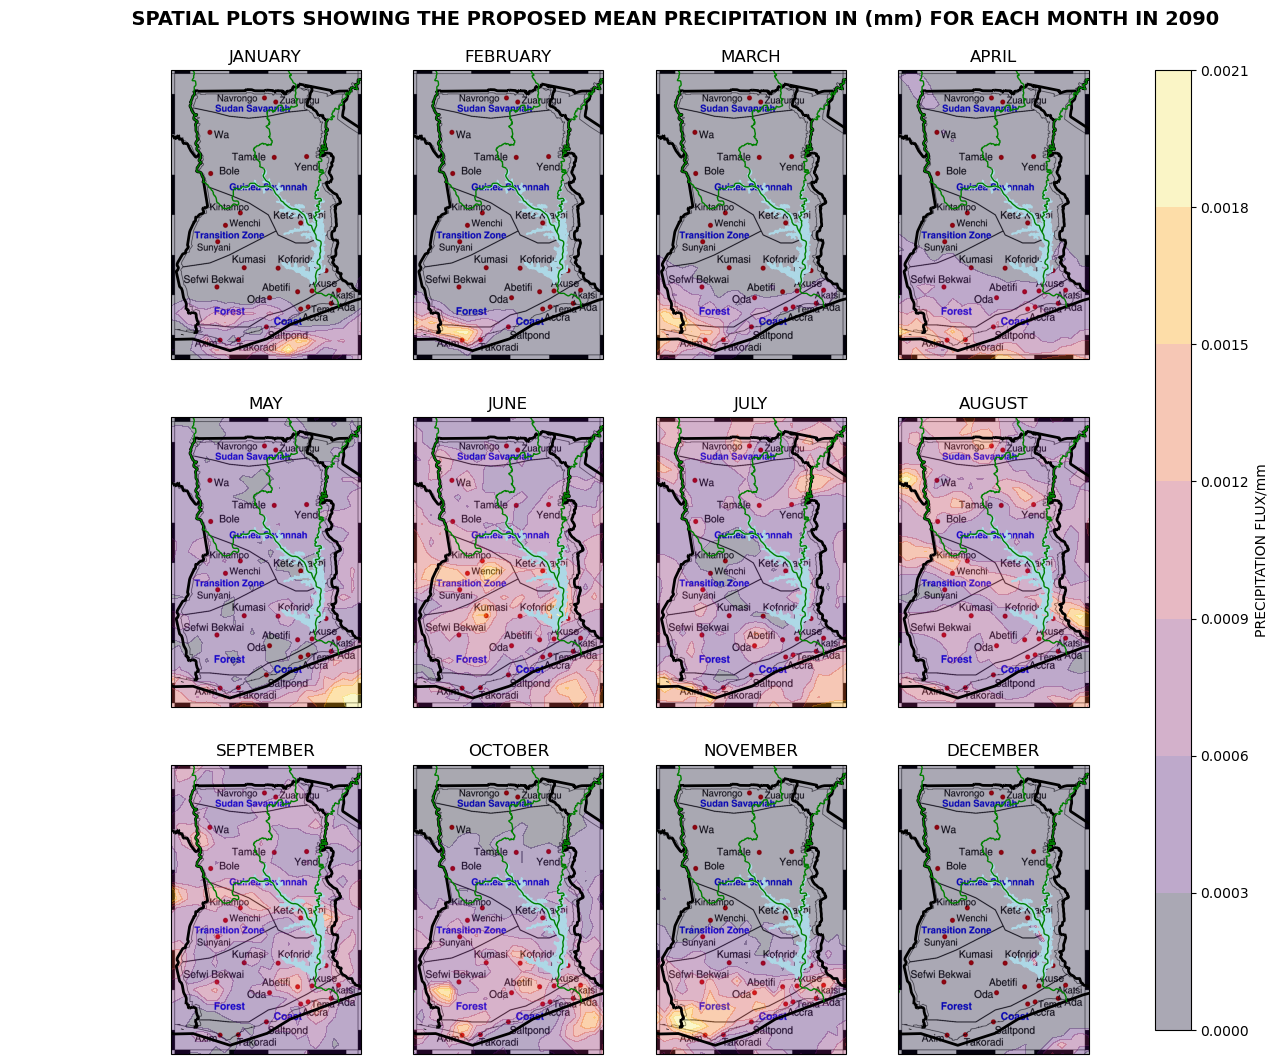

In [30]:
image = Image.open('journal.png')

fig, ax = plt.subplots(3, 4, figsize=(12,12), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()

month_names = ['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL',
               'MAY', 'JUNE','JULY', 'AUGUST', 
               'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER']

for i in range(12):
    ax[i].imshow(image, extent=[-3.4,1.2,4.5,11.5], transform=ccrs.PlateCarree())
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)

    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='lightblue')
    rivers = NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m', edgecolor='g', facecolor='none')

    ax[i].add_feature(rivers)
    ax[i].set_extent([-3.4, 1.2, 4.5, 11.5], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb = ax[i].contourf(MONTHLY_RAIN_2090.longitude, MONTHLY_RAIN_2090.latitude, MONTHLY_RAIN_2090[i], 
                        transform=ccrs.PlateCarree(),cmap='inferno', alpha=0.35)

cbar_kwargs = fig.add_axes([0.95, 0.13, 0.03, 0.8])  
fig.colorbar(cb, cax=cbar_kwargs, label='PRECIPITATION FLUX/mm')
fig.subplots_adjust(wspace=0.2, top=0.93)
fig.suptitle('                  SPATIAL PLOTS SHOWING THE PROPOSED MEAN PRECIPITATION IN (mm) FOR EACH MONTH IN 2090', 
             fontsize=14,y=0.98,fontweight='bold')
fig.savefig(r'C:\Users\HP\Desktop\PRECIPITATION\2090_Prep.png', dpi=1200, bbox_inches='tight')
plt.show()
